## CNN

A Convolutional Neural Network (CNN) is a specialized type of deep learning model known for its ability to understand patterns in data like images or audio. In a human scream detection project, CNNs are ideal because they can effectively recognize scream sounds by analyzing features in audio recordings, even in noisy environments typical of urban settings.

In [ ]:
#Installing the needed libraries
!pip install librosa tensorflow matplotlib

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import class_weight
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/My Drive/DeepLearning/code/dataset/"

X_train = np.load(data_path + 'X_train.npy')
X_val = np.load(data_path + 'X_val.npy')
X_test = np.load(data_path + 'X_test.npy')
y_train = np.load(data_path + 'y_train.npy')
y_val = np.load(data_path + 'y_val.npy')
y_test = np.load(data_path + 'y_test.npy')
X_train_da = np.load(data_path + 'X_train_da.npy')
y_train_da = np.load(data_path + 'y_train_da.npy')

##Baseline CNN

###Build and Train

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Two classes: screaming (1) and not screaming (0)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.reshape((*X_train.shape, 1))
X_val = X_val.reshape((*X_val.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

Epoch 1/10
88/88 [==============================] - 18s 114ms/step - loss: 73.4330 - accuracy: 0.7266 - val_loss: 0.5329 - val_accuracy: 0.7020
Epoch 2/10
88/88 [==============================] - 8s 88ms/step - loss: 0.4463 - accuracy: 0.8074 - val_loss: 0.5318 - val_accuracy: 0.7851
Epoch 3/10
88/88 [==============================] - 8s 90ms/step - loss: 0.3938 - accuracy: 0.8404 - val_loss: 0.5182 - val_accuracy: 0.7937
Epoch 4/10
88/88 [==============================] - 8s 89ms/step - loss: 0.2963 - accuracy: 0.8812 - val_loss: 0.6067 - val_accuracy: 0.8138
Epoch 5/10
88/88 [==============================] - 8s 91ms/step - loss: 0.2059 - accuracy: 0.9270 - val_loss: 0.8175 - val_accuracy: 0.7937
Epoch 6/10
88/88 [==============================] - 8s 91ms/step - loss: 0.1876 - accuracy: 0.9399 - val_loss: 1.1942 - val_accuracy: 0.7794
Epoch 7/10
88/88 [==============================] - 8s 89ms/step - loss: 0.2777 - accuracy: 0.8901 - val_loss: 1.1128 - val_accuracy: 0.7765
Epoch 8/10

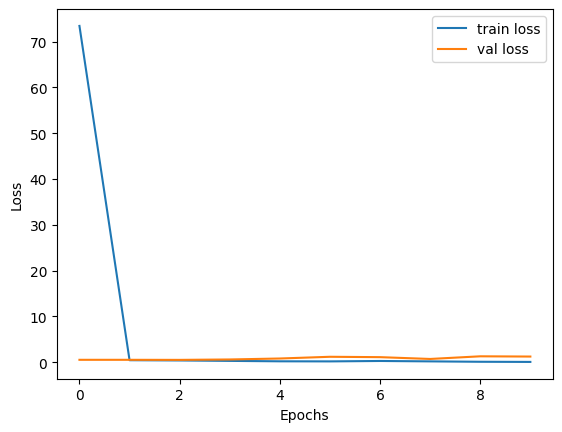

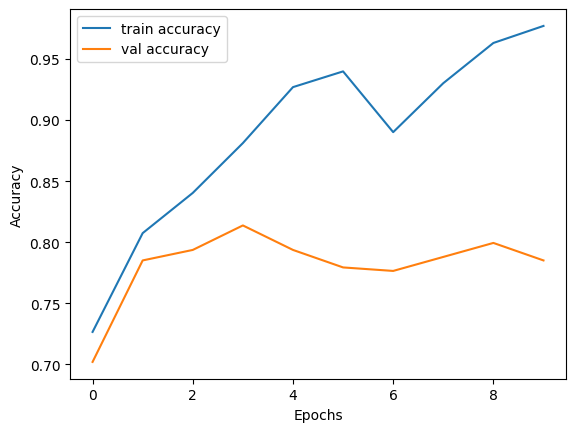

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

11/11 [==============================] - 0s 24ms/step


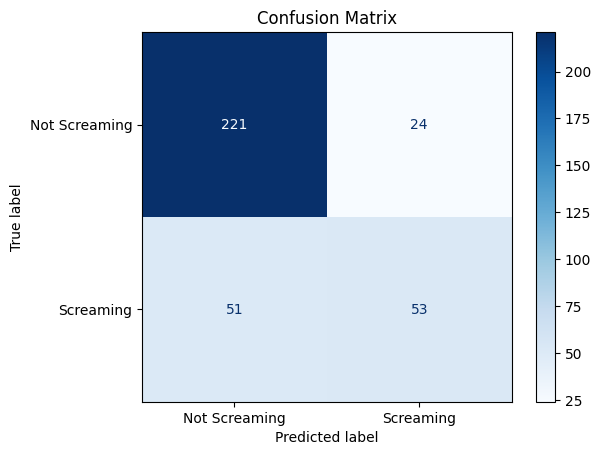

In [ ]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Evaluation
Model has high accuracy on the training set, but its performance on the validation set remains stable and does not significantly improve during training. The evaluation metrics (precision, recall, f1-score) for class 1 are low, indicate that the model fails to recognize the samples of this class with the same accuracy. This may be due to data imbalance or other factors such as overfitting.








## CNN after noise level 40%
### Build and Train the model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(X_train_da.shape[1], X_train_da.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Two classes: screaming (1) and not screaming (0)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

X_train_da = X_train_da.reshape((*X_train_da.shape, 1))
X_val = X_val.reshape((*X_val.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

history = model.fit(X_train_da, y_train_da,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
132/132 [==============================] - 17s 109ms/step - loss: 32.2354 - accuracy: 0.5800 - val_loss: 0.5038 - val_accuracy: 0.7708
Epoch 2/10
132/132 [==============================] - 12s 92ms/step - loss: 0.5934 - accuracy: 0.7207 - val_loss: 0.4912 - val_accuracy: 0.7794
Epoch 3/10
132/132 [==============================] - 12s 92ms/step - loss: 0.5145 - accuracy: 0.7779 - val_loss: 0.4859 - val_accuracy: 0.8052
Epoch 4/10
132/132 [==============================] - 12s 92ms/step - loss: 0.4673 - accuracy: 0.7948 - val_loss: 0.4886 - val_accuracy: 0.7822
Epoch 5/10
132/132 [==============================] - 12s 92ms/step - loss: 0.4110 - accuracy: 0.8264 - val_loss: 0.6176 - val_accuracy: 0.7966
Epoch 6/10
132/132 [==============================] - 12s 92ms/step - loss: 0.3566 - accuracy: 0.8466 - val_loss: 0.5864 - val_accuracy: 0.8138
Epoch 7/10
132/132 [==============================] - 12s 91ms/step - loss: 0.3345 - accuracy: 0.8530 - val_loss: 0.6570 - val_accurac

### Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(np.argmax(y_test, axis=1), y_pred_classes))

11/11 [==============================] - 0s 33ms/step - loss: 0.8484 - accuracy: 0.7800
Test accuracy: 0.7799999713897705
11/11 [==============================] - 0s 25ms/step
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       252
           1       0.61      0.61      0.61        98

    accuracy                           0.78       350
   macro avg       0.73      0.73      0.73       350
weighted avg       0.78      0.78      0.78       350



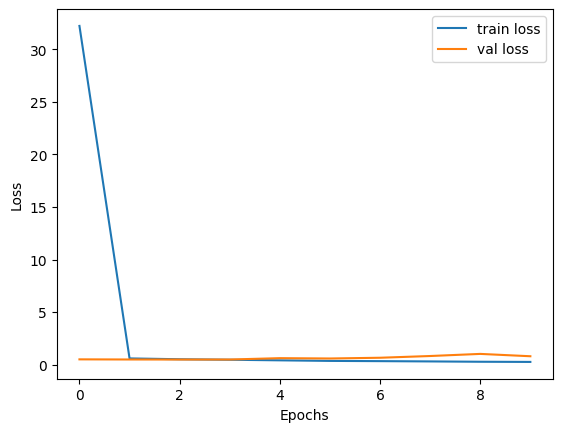

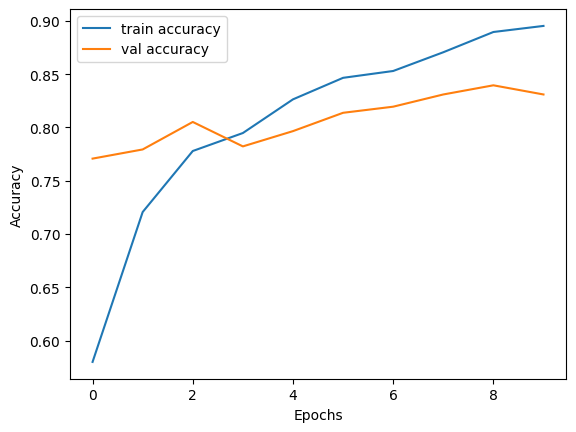

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

11/11 [==============================] - 0s 24ms/step


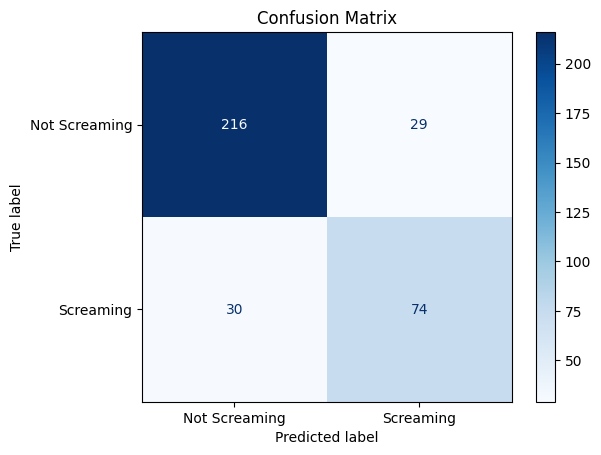

In [ ]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## CNN with Class_weights only

###Build and Train

In [ ]:
def plot_class_distribution(class_counts, title):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(class_counts)), class_counts, color=['blue', 'orange'])
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(range(len(class_counts)), ['Not Screaming', 'Screaming'])
    plt.show()

y_train_classes = np.argmax(y_train, axis=1)
train_class_counts = np.bincount(y_train_classes)

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_classes),
                                                  y=y_train_classes)
class_weights = dict(enumerate(class_weights))

adjusted_train_class_counts = train_class_counts * np.array([class_weights[0], class_weights[1]])

def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))  # 2 output neurons for binary classification

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_cnn_model(X_train, y_train, X_val, y_val, class_weights, epochs=20, batch_size=32):
    input_shape = (X_train.shape[1], X_train.shape[2], 1)

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

    model = create_cnn_model(input_shape)

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), class_weight=class_weights)

    return model, history

model, history = train_cnn_model(X_train, y_train, X_val, y_val, class_weights, epochs=20, batch_size=32)


Epoch 1/20
88/88 [==============================] - 24s 165ms/step - loss: 23.7779 - accuracy: 0.5927 - val_loss: 0.6741 - val_accuracy: 0.5587
Epoch 2/20
88/88 [==============================] - 10s 112ms/step - loss: 0.5246 - accuracy: 0.7523 - val_loss: 0.5443 - val_accuracy: 0.7507
Epoch 3/20
88/88 [==============================] - 11s 121ms/step - loss: 0.4750 - accuracy: 0.7756 - val_loss: 0.8789 - val_accuracy: 0.5673
Epoch 4/20
88/88 [==============================] - 10s 114ms/step - loss: 0.5652 - accuracy: 0.7792 - val_loss: 0.5389 - val_accuracy: 0.7450
Epoch 5/20
88/88 [==============================] - 10s 116ms/step - loss: 0.5138 - accuracy: 0.7810 - val_loss: 0.7236 - val_accuracy: 0.7421
Epoch 6/20
88/88 [==============================] - 10s 117ms/step - loss: 0.5246 - accuracy: 0.7591 - val_loss: 0.5205 - val_accuracy: 0.7593
Epoch 7/20
88/88 [==============================] - 10s 114ms/step - loss: 0.4423 - accuracy: 0.8035 - val_loss: 0.4816 - val_accuracy: 0.782

###Evaluation

In [ ]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test loss: {loss:.4f}')
    print(f'Test accuracy: {accuracy:.4f}')

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    class_report = classification_report(y_true, y_pred_classes)
    print("Classification Report:")
    print(class_report)

# Load the test set and evaluate
X_test = np.load(data_path + 'X_test.npy')
y_test = np.load(data_path + 'y_test.npy')
evaluate_model(model, X_test, y_test)

11/11 [==============================] - 1s 141ms/step - loss: 1.8584 - accuracy: 0.7257
Test loss: 1.8584
Test accuracy: 0.7257
11/11 [==============================] - 0s 29ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       252
           1       0.51      0.44      0.47        98

    accuracy                           0.73       350
   macro avg       0.65      0.64      0.64       350
weighted avg       0.71      0.73      0.72       350



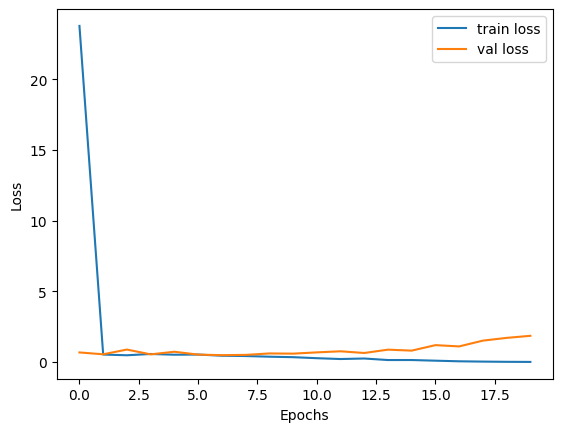

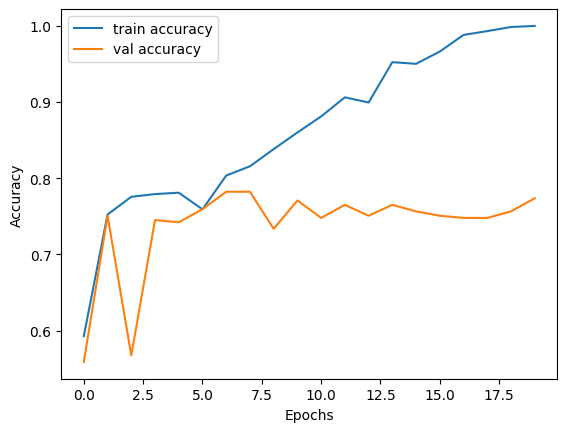

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

11/11 [==============================] - 0s 33ms/step


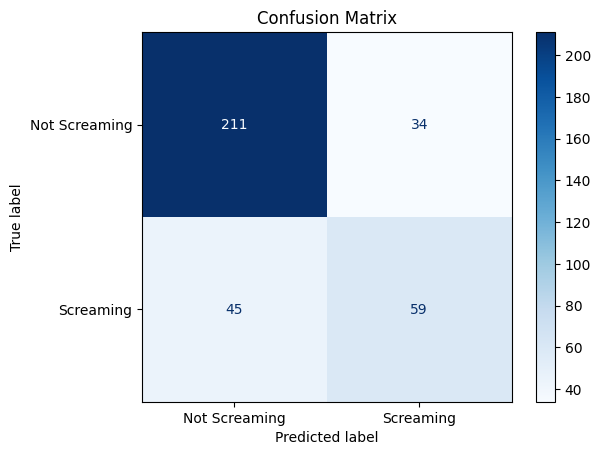

In [ ]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

##CNN after  Data Augmentation and class_weights
###Build and Train



In [ ]:
def plot_class_distribution(class_counts, title):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(class_counts)), class_counts, color=['blue', 'orange'])
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(range(len(class_counts)), ['Not Screaming', 'Screaming'])
    plt.show()

y_train_da_classes = np.argmax(y_train_da, axis=1)
train_da_class_counts = np.bincount(y_train_da_classes)

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_da_classes),
                                                  y=y_train_da_classes)
class_weights = dict(enumerate(class_weights))

adjusted_train_da_class_counts = train_da_class_counts * np.array([class_weights[0], class_weights[1]])

def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_da_cnn_model(X_train_da, y_train_da, X_val, y_val, class_weights, epochs=20, batch_size=32):
    input_shape = (X_train_da.shape[1], X_train_da.shape[2], 1)

    X_train_da = X_train_da.reshape((X_train_da.shape[0], X_train_da.shape[1], X_train_da.shape[2], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

    model = create_cnn_model(input_shape)

    history = model.fit(X_train_da, y_train_da, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), class_weight=class_weights)
    return model, history

model, history = train_da_cnn_model(X_train_da, y_train_da, X_val, y_val, class_weights, epochs=20, batch_size=32)

Epoch 1/20
132/132 [==============================] - 30s 156ms/step - loss: 20.3163 - accuracy: 0.6793 - val_loss: 0.5014 - val_accuracy: 0.7536
Epoch 2/20
132/132 [==============================] - 15s 115ms/step - loss: 0.5154 - accuracy: 0.7672 - val_loss: 0.5206 - val_accuracy: 0.7851
Epoch 3/20
132/132 [==============================] - 15s 116ms/step - loss: 0.4400 - accuracy: 0.7993 - val_loss: 0.5690 - val_accuracy: 0.8080
Epoch 4/20
132/132 [==============================] - 15s 113ms/step - loss: 0.3760 - accuracy: 0.8287 - val_loss: 0.5712 - val_accuracy: 0.7736
Epoch 5/20
132/132 [==============================] - 15s 113ms/step - loss: 0.2930 - accuracy: 0.8798 - val_loss: 0.6658 - val_accuracy: 0.7765
Epoch 6/20
132/132 [==============================] - 15s 114ms/step - loss: 0.1659 - accuracy: 0.9382 - val_loss: 0.8832 - val_accuracy: 0.7708
Epoch 7/20
132/132 [==============================] - 15s 115ms/step - loss: 0.0985 - accuracy: 0.9675 - val_loss: 1.0329 - val_a

###Evaluation

In [ ]:
def evaluate_model(model, X_test, y_test):
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test loss: {loss:.4f}')
    print(f'Test accuracy: {accuracy:.4f}')

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    class_report = classification_report(y_true, y_pred_classes)
    print("Classification Report:")
    print(class_report)

X_test = np.load(data_path + 'X_test.npy')
y_test = np.load(data_path + 'y_test.npy')
evaluate_model(model, X_test, y_test)

11/11 [==============================] - 2s 154ms/step - loss: 2.1141 - accuracy: 0.7657
Test loss: 2.1141
Test accuracy: 0.7657
11/11 [==============================] - 1s 43ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       252
           1       0.59      0.54      0.56        98

    accuracy                           0.77       350
   macro avg       0.71      0.70      0.70       350
weighted avg       0.76      0.77      0.76       350



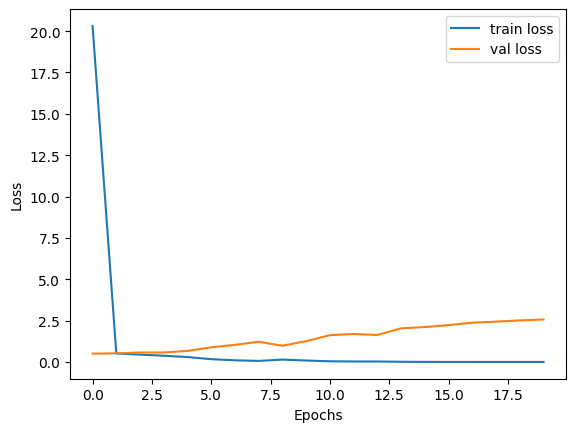

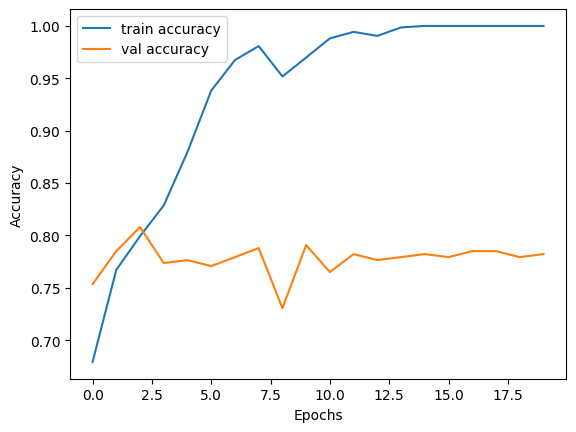

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

11/11 [==============================] - 0s 34ms/step


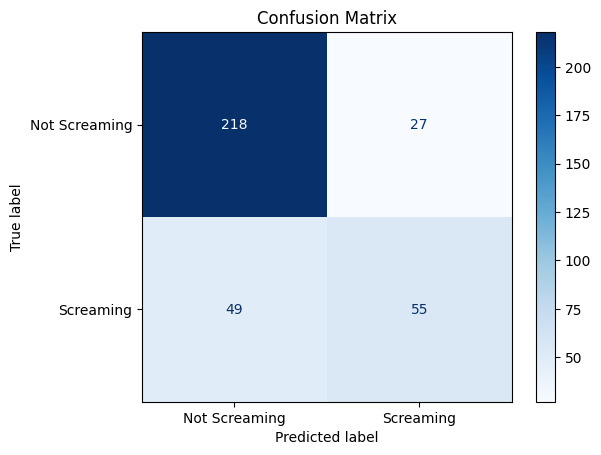

In [ ]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

y_pred_prob = model.predict(X_val)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(np.argmax(y_val, axis=1), y_pred)

labels = ['Not Screaming', 'Screaming']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()